## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# !pip install imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

## Data Preprocessing

In [4]:
df = pd.read_csv("heart_attack_prediction_dataset.csv")

In [5]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [6]:
# '0' as 'Unhealthy', '1' as 'Average' and '2' as 'Healthy'

ordinal_map = {'Healthy' : 2, 'Average' : 1, 'Unhealthy' : 0}
df['Diet'] = df['Diet'].map(ordinal_map)

# '1' as 'Male' and '0' as 'Female'

ordinal_map_sex = {'Male' : 1, 'Female' : 0}
df['Sex'] = df['Sex'].map(ordinal_map_sex)


In [7]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [8]:
# 'Blood Pressure' column into 'BP_Systolic' and 'BP_Diastolic'.

df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand = True)

df['BP_Systolic'] = pd.to_numeric(df['BP_Systolic'])
df['BP_Diastolic'] = pd.to_numeric(df['BP_Diastolic'])

df = df.drop("Blood Pressure", axis = 1)
df = df.drop(columns = ['Country', 'Continent', 'Hemisphere'])

In [9]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
BP_Systolic                          int64
BP_Diastoli

In [10]:
df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
BP_Systolic                        0
BP_Diastolic                       0
dtype: int64

In [11]:
X = df[['Sex', 'Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
        'BP_Systolic', 'BP_Diastolic', 'Smoking', 'Obesity', 'Alcohol Consumption', 
        'Diet', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Triglycerides', 'Sleep Hours Per Day']]

y = df['Heart Attack Risk'].values

# K Neighbors Classifier

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [13]:
# Feature Scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
classifier_3 = KNeighborsClassifier(n_neighbors = 3)
classifier_5 = KNeighborsClassifier(n_neighbors = 5)
classifier_7 = KNeighborsClassifier(n_neighbors = 7)
classifier_12 = KNeighborsClassifier(n_neighbors = 12)

In [15]:
# Fit Model

classifier_3.fit(X_train, y_train)
classifier_5.fit(X_train, y_train)
classifier_7.fit(X_train, y_train)
classifier_12.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [16]:
# Predict the test results

y_pred_3 = classifier_3.predict(X_test)
y_pred_5 = classifier_5.predict(X_test)
y_pred_7 = classifier_7.predict(X_test)
y_pred_12 = classifier_12.predict(X_test)

[[807 335]
 [448 163]]
0.5533371363377068
[[847 295]
 [469 142]]
0.5641756988020536
[[898 244]
 [482 129]]
0.5858528237307473
[[1041  101]
 [ 565   46]]
0.6200798630918426


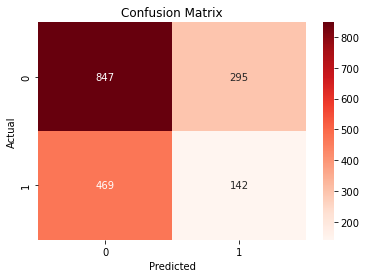

In [17]:
# Evaluate Model

cm_KNN = confusion_matrix(y_test, y_pred_3)
print(cm_KNN)
print(accuracy_score(y_test, y_pred_3))

cm_KNN = confusion_matrix(y_test, y_pred_5)
print(cm_KNN)
print(accuracy_score(y_test, y_pred_5))

cm_KNN = confusion_matrix(y_test, y_pred_7)
print(cm_KNN)
print(accuracy_score(y_test, y_pred_7))

cm_KNN = confusion_matrix(y_test, y_pred_12)
print(cm_KNN)
print(accuracy_score(y_test, y_pred_12))

cm_KNN = confusion_matrix(y_test, y_pred_5)
acc_KNN = accuracy_score(y_test, y_pred_5)
sns.heatmap(cm_KNN, annot = True, fmt = 'd', cmap = 'Reds')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Decision Tree

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
# Standardize the data

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
# Define the hyperparameters and their possible value

param_grid = {
    'max_depth' : [None, 5, 7, 10, 20, 30],
    'min_samples_leaf' : [1, 2, 4, 6],
    'criterion' : ['gini', 'entropy']
}

dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6}


In [21]:
best_params = grid_search.best_params_
clf = DecisionTreeClassifier(**best_params)

In [22]:
# Train the model on the training set

clf_model = clf.fit(X_train, y_train)

In [23]:
# Predict the test set results

y_pred = clf_model.predict(X_test)

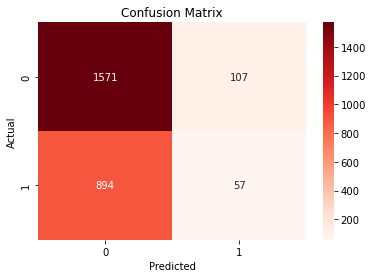

[[1571  107]
 [ 894   57]]
0.6192468619246861


In [24]:
# Evaluate Model

cm_dtree = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_dtree, annot = True, fmt = 'd', cmap = 'Reds')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(cm_dtree)
acc_dtree = accuracy_score(y_test, y_pred)
print(acc_dtree)

# Random Forest

In [25]:
smote = SMOTE(random_state = 0) 
X_resample, y_resample = smote.fit_resample(X, y)

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resample)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resample, test_size = 0.3, random_state = 0)

In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = model.predict(X_test)

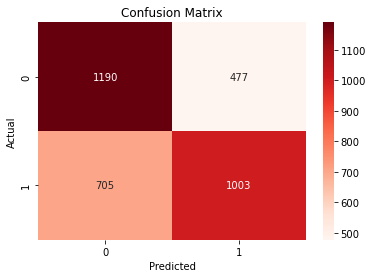

0.6497777777777778


In [31]:
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot = True, fmt = 'd', cmap = 'Reds')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
acc_rf = accuracy_score(y_test, y_pred)
print(acc_rf)

# Comparison between models

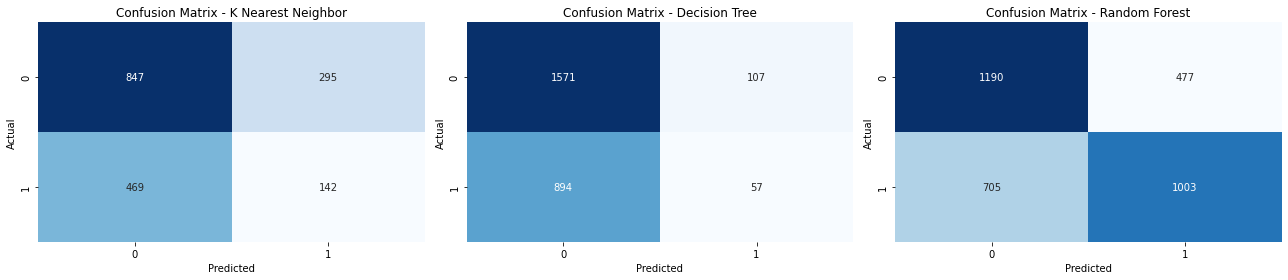

In [32]:
def plot_confusion_matrix(matrix, model_name, ax):
    sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, ax = ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix - {model_name}')

fig, axes = plt.subplots(1, 3, figsize = (18, 4))

plot_confusion_matrix(cm_KNN, 'K Nearest Neighbor', axes[0])
plot_confusion_matrix(cm_dtree, 'Decision Tree', axes[1])
plot_confusion_matrix(cm_rf, 'Random Forest', axes[2])

plt.tight_layout()
plt.show()

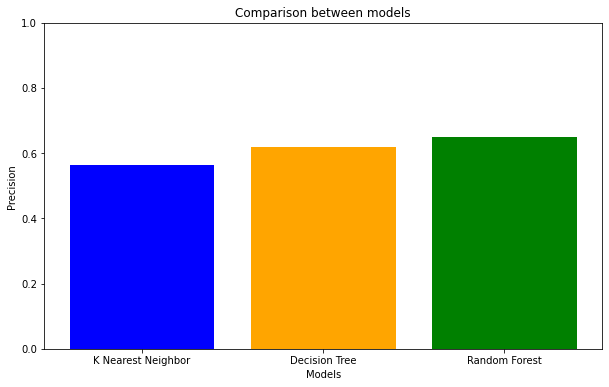

In [33]:
precisions = [acc_KNN, acc_dtree, acc_rf]
model_names = ['K Nearest Neighbor', 'Decision Tree', 'Random Forest']

plt.figure(figsize = (10, 6))
plt.bar(model_names, precisions, color = ['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison between models')
plt.ylim(0, 1)
plt.show()
